In [1]:
from matplotlib import pyplot as plt
import random
import os
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 18,
         'axes.titlesize':'x-large',
         'xtick.labelsize':12,
         'ytick.labelsize':12}
pylab.rcParams.update(params)

In [2]:
save_loc = 'figures_030625'

def read_strip(file):
    df = pd.read_csv(file)
    df.insert(2, '2', df['0'].astype(str) + "_" + df['1'].astype(str))
    return df

def process_raw(df_, level):
    # Dataset
    match level:
        case 'trial':
            df = df_.groupby(['0','1','ei','memory','search_cost','tau'])[['6']].mean()
            df = df.reset_index()
        case 'expid':
            df = df_.groupby(['0','ei','memory','search_cost','tau'])[['6']].mean()
            df = df.reset_index()
        case 'dataset':
            df = df_.groupby(['ei','memory','search_cost','tau','Collective'])[['6']].mean()
            df = df.reset_index()

    return df

def top_values(df, number):
    topx = df.sort_values(by=['6'],ascending=False)[0:number].copy()
    topx_mean = topx.mean()
    return [topx, topx_mean]

def plot_4panel(df, title, bins):
    fig, axes = plt.subplots(1,4,figsize=(13.33,3.33))
    axes = axes.flatten()
    sns.histplot(data=df, x='memory', ax=axes[0], bins=bins)
    sns.kdeplot(data=df, x='search_cost', ax=axes[1], linewidth=2)
    sns.kdeplot(data=df, x='ei', ax=axes[2], linewidth=2)
    sns.kdeplot(data=df, x='tau', ax=axes[3], linewidth=2)

    axes[0].set_xlim(0,50)
    axes[1].set_xlim(0,0.5)
    axes[2].set_xlim(0,0.5)
    axes[3].set_xlim(0,1)   

    axes[0].set_xlabel('Memory')
    axes[1].set_xlabel('Search Cost')
    axes[2].set_xlabel('Curiosity')
    axes[3].set_xlabel('Decision Error')

    # plt.suptitle(f'{title}')
    plt.tight_layout()
    plt.savefig(f'{save_loc}/4panel_{title}.pdf')
    plt.savefig(f'{save_loc}/4panel_{title}.png')
    plt.show()

def loglik_dist(df, title, bins):
    plt.figure(figsize=(5,5))
    sns.histplot(data=df, x='6', stat='count', bins=bins)
    
    plt.xlim(-1000,-200)
    
    # plt.title(f'{title}')
    plt.xlabel('LogLik', fontsize=18)
    plt.ylabel('Count', fontsize=18)
    
    plt.tight_layout()
    plt.savefig(f'{save_loc}/loglikdist_{title}.pdf')
    plt.savefig(f'{save_loc}/loglikdist_{title}.png')
    plt.show()

In [3]:
MW_data = pd.read_csv('MasonWattsExpData.csv',low_memory=False)

expid_collective = MW_data[['expid','collective']].drop_duplicates()
expid_collective.rename(columns={'expid': '0'}, inplace=True)

num_labels = pd.get_dummies(expid_collective['collective'], dtype='int')
expid_collective = pd.concat([expid_collective,num_labels], axis=1)

In [4]:
folder = 'table_data_2/'
files = [f"{folder}{each}" for each in os.listdir(folder)]
csv_stack = [read_strip(each).merge(expid_collective,on='0') for each in files]

for df in csv_stack:
    print(len(df['2'].unique()))

573
573
573
573
573
573
573


In [19]:
test = csv_stack[0]

test[(test['2']=='1035_2')]

,0,1,2,ei,memory,search_cost,tau,6,collective,Collective,Independent
0,1035,2,1035_2,0.253974,35,0.371404,0.259193,-625.294907,Collective,1,0
4,1035,2,1035_2,0.279541,26,0.203145,0.319586,-655.444865,Collective,1,0
12,1035,2,1035_2,0.488450,47,0.490224,0.471923,-752.637872,Collective,1,0
40,1035,2,1035_2,0.079767,26,0.381387,0.687482,-791.979745,Collective,1,0
41,1035,2,1035_2,0.282372,5,0.393694,0.984471,-821.448639,Collective,1,0
...,...,...,...,...,...,...,...,...,...,...,...
79964,1035,2,1035_2,0.053024,5,0.126369,0.723927,-780.291776,Collective,1,0
79965,1035,2,1035_2,0.088773,6,0.020572,0.949981,-803.345392,Collective,1,0
79967,1035,2,1035_2,0.334912,3,0.176969,0.723087,-787.905739,Collective,1,0
79975,1035,2,1035_2,0.265662,1,0.458464,0.564448,-825.429135,Collective,1,0


In [30]:
pal = sns.color_palette('bright')
pal.as_hex()[0:6]

['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800']

In [5]:
level = 'dataset'
results = [process_raw(df, level) for df in csv_stack]

In [6]:
for i in range(len(files)):
    print(files[i])
    print(results[i][(results[i]['Collective']==1)].sort_values(by='6',ascending=False)[0:5])


table_data_2/agg_results_MLE_10k-2.csv
             ei  memory  search_cost       tau  Collective           6
8021   0.201557       5     0.121397  0.098430           1 -414.526493
3331   0.083120       6     0.158586  0.101942           1 -417.156866
9555   0.239090       5     0.121838  0.106591           1 -418.496424
11425  0.287497       7     0.160212  0.088518           1 -419.212151
1657   0.040669      10     0.137844  0.094034           1 -420.046673
table_data_2/agg_results_learnsolocopyfree_25k.csv
             ei  memory  search_cost       tau  Collective           6
2521   0.024188       5     0.157348  0.111481           1 -483.024504
31413  0.312768       6     0.147529  0.112136           1 -483.796600
24977  0.248080       8     0.168130  0.097763           1 -486.852996
16397  0.162673       6     0.116140  0.098820           1 -487.006196
13453  0.133748       7     0.121475  0.114113           1 -487.156878
table_data_2/agg_results_Solo_25k.csv
             ei  mem

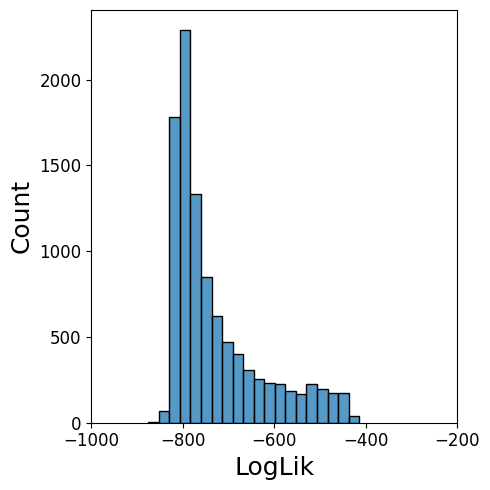

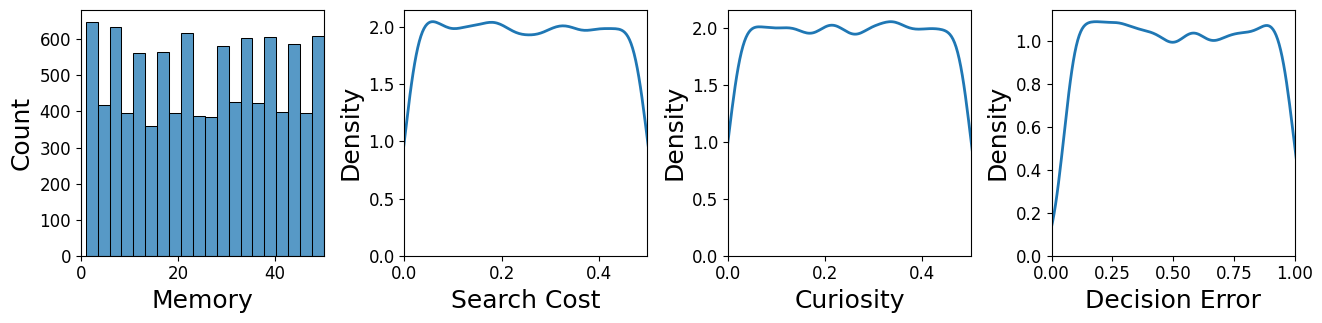

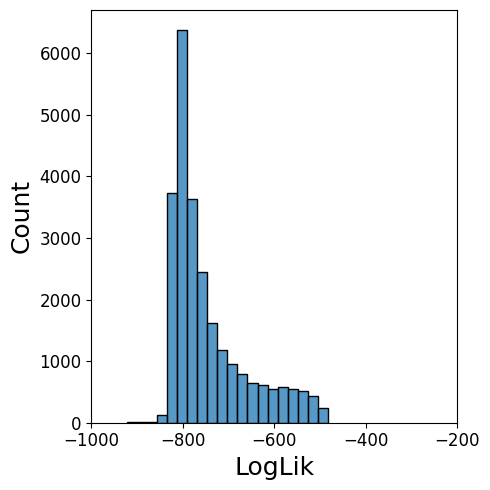

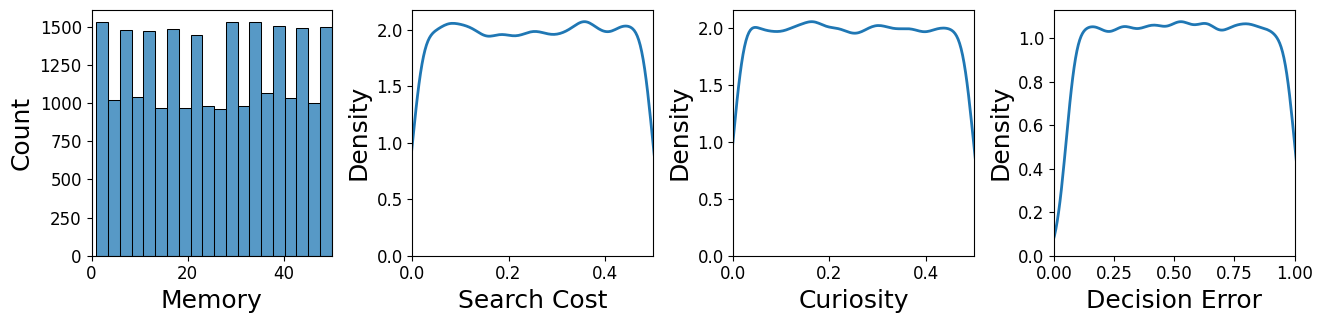

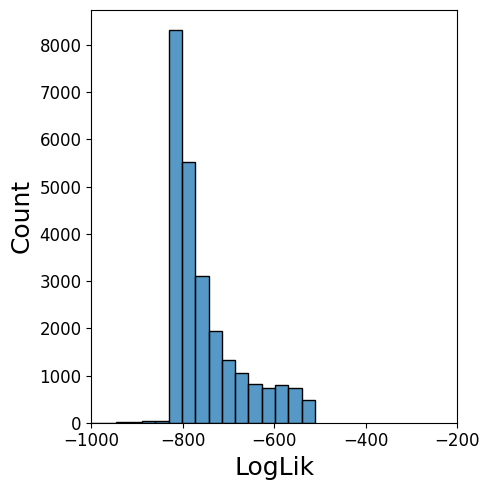

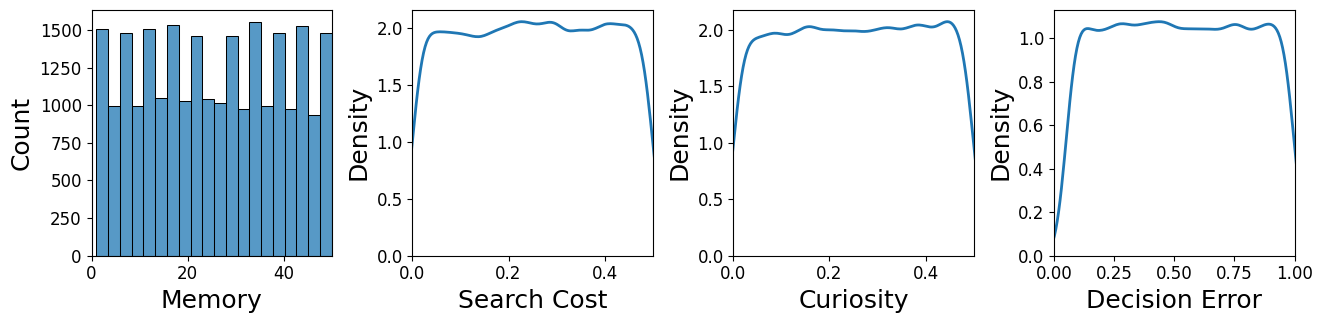

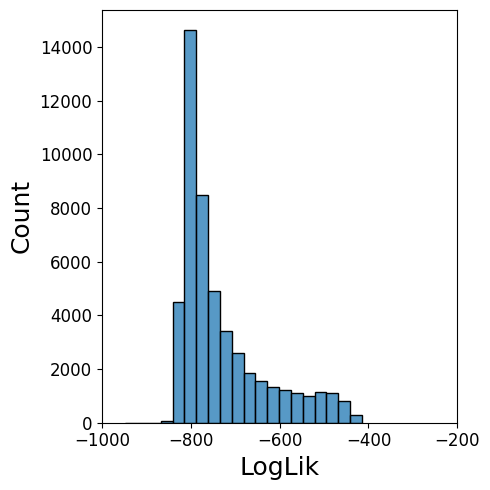

/var/folders/3c/w5n9m4w96bx0_qmrn9qzb__r0000gn/T/ipykernel_16867/2176192702.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='ei', ax=axes[2], linewidth=2)


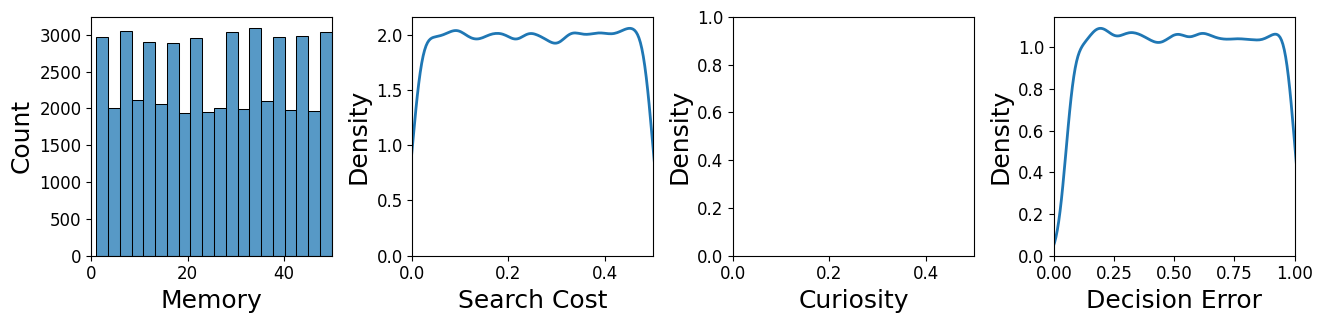

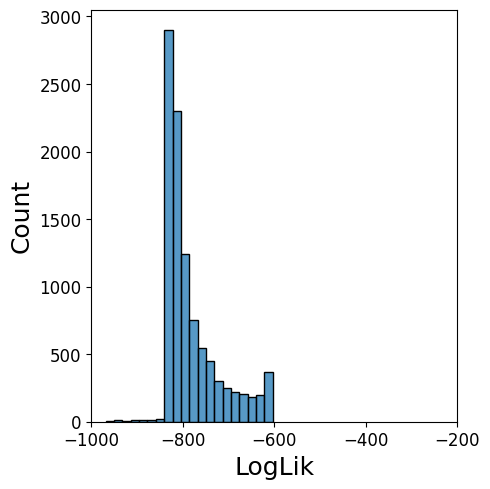

/var/folders/3c/w5n9m4w96bx0_qmrn9qzb__r0000gn/T/ipykernel_16867/2176192702.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='search_cost', ax=axes[1], linewidth=2)
/var/folders/3c/w5n9m4w96bx0_qmrn9qzb__r0000gn/T/ipykernel_16867/2176192702.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='ei', ax=axes[2], linewidth=2)


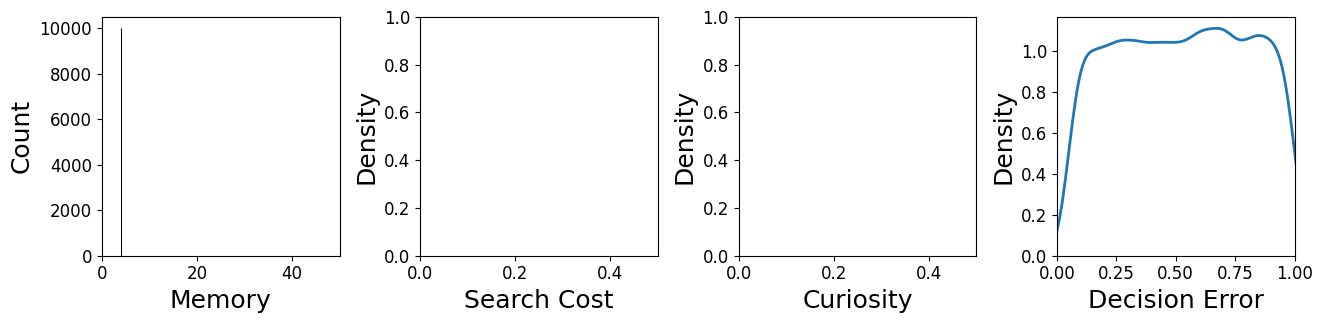

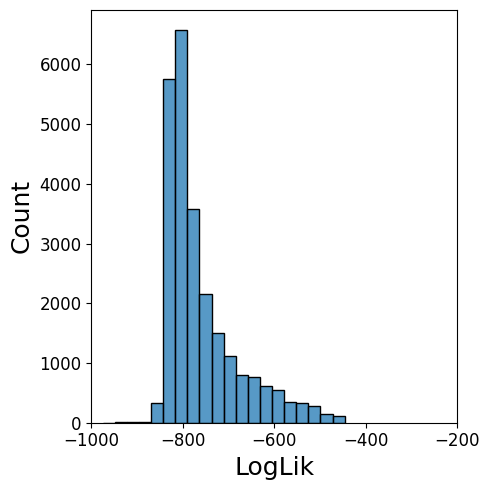

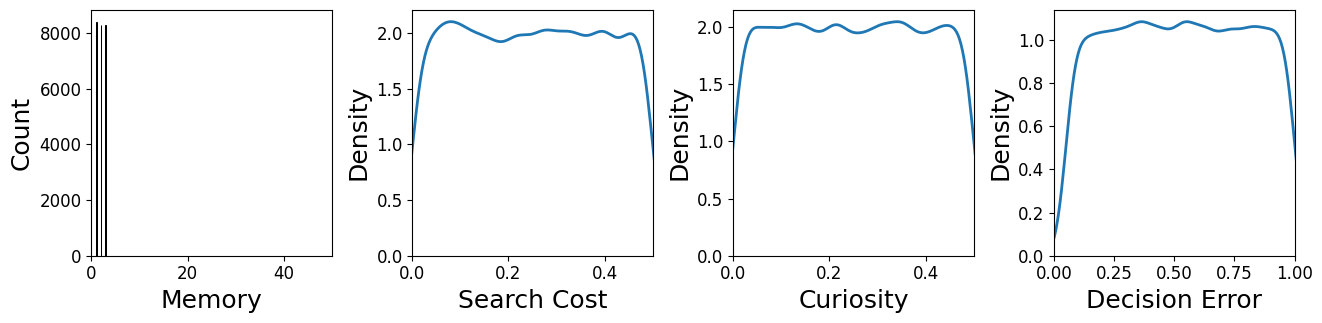

In [41]:
for i in range(6):
    # print(files[i].split('agg_results_')[1].split('_')[0])
    plt_title = "dataset_level" + files[i].split('agg_results_')[1].split('_')[0] + f'_{level}'
    loglik_dist(results[i][(results[i]['Collective']==1)],
                plt_title, 20)
    plot_4panel(results[i][(results[i]['Collective']==1)],
                plt_title, 20)

In [42]:
names = []
tops = []
for i in range(6):
    names.append(files[i])
    tops.append(top_values(results[i][(results[i]['Collective']==1)],
                           100)[0])

In [38]:
# for i in range(6):
#     print(names[i])
#     print(tops[i])

# for i in range(6):
#     print(files[i])
#     loglik_dist(results[i])

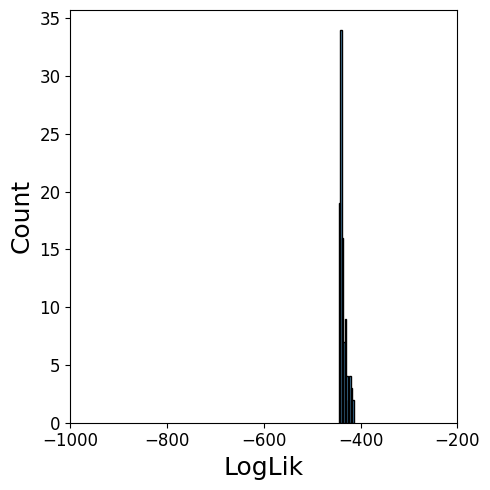

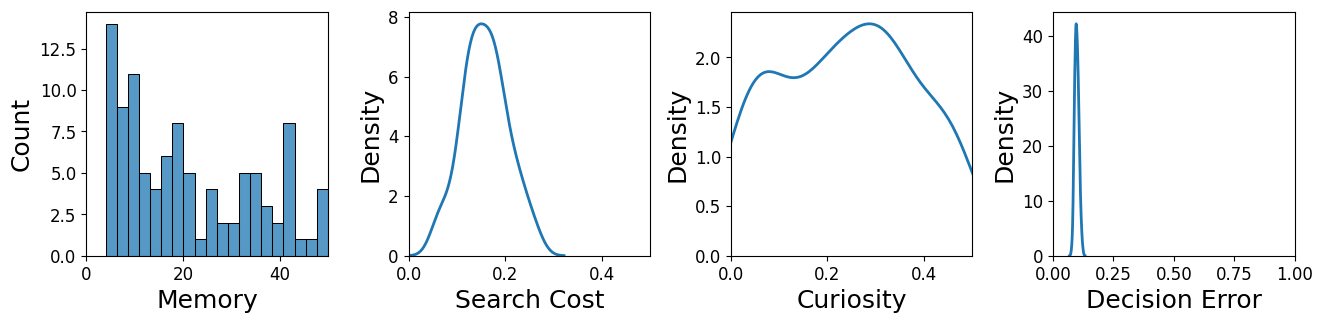

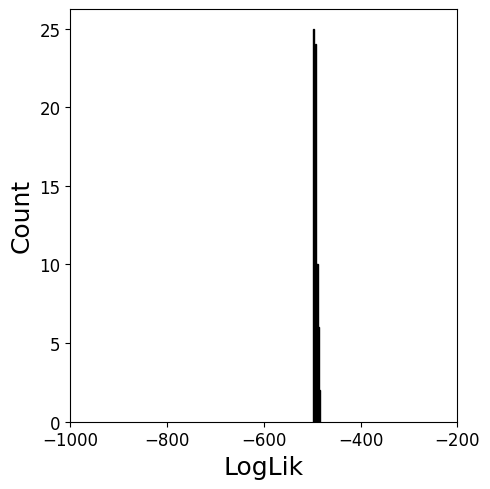

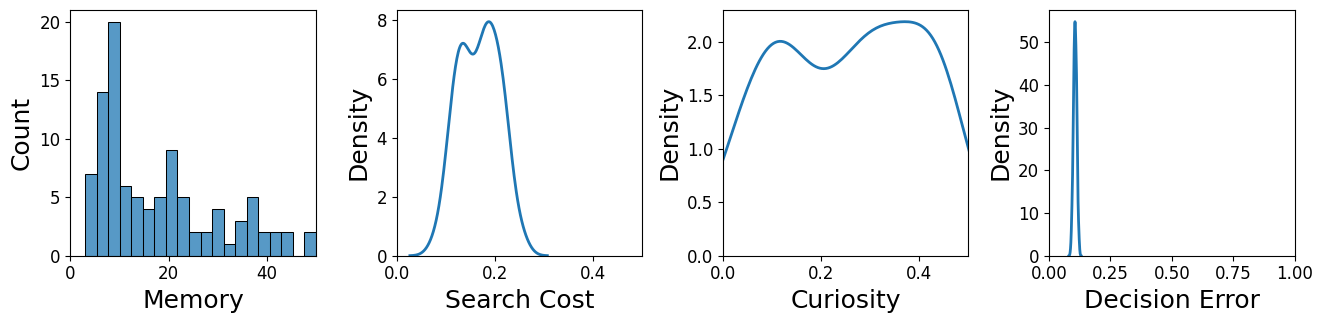

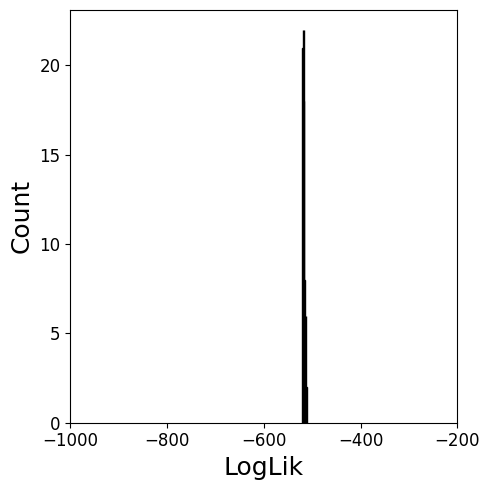

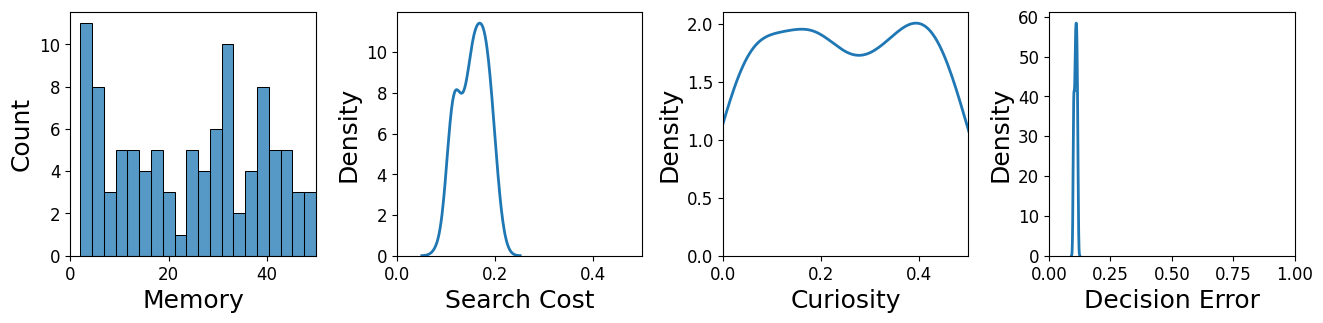

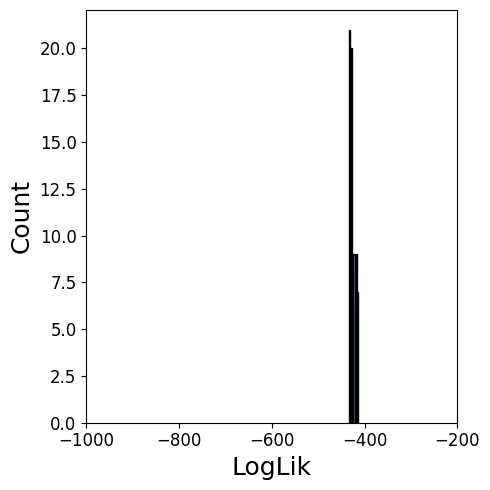

/var/folders/3c/w5n9m4w96bx0_qmrn9qzb__r0000gn/T/ipykernel_16867/2176192702.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='ei', ax=axes[2], linewidth=2)


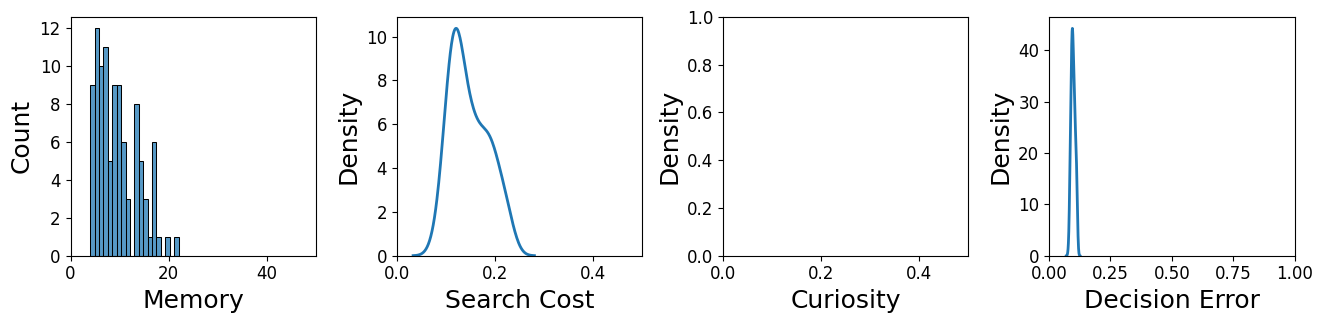

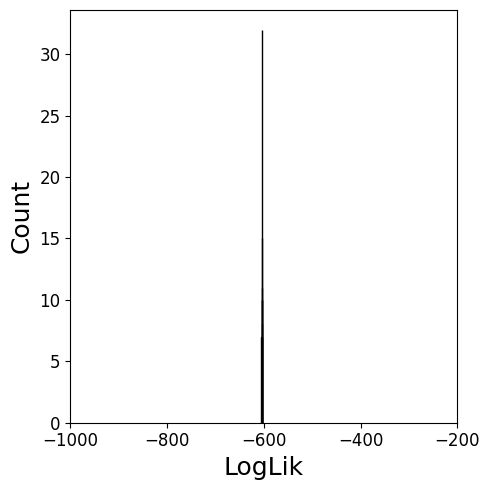

/var/folders/3c/w5n9m4w96bx0_qmrn9qzb__r0000gn/T/ipykernel_16867/2176192702.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='search_cost', ax=axes[1], linewidth=2)
/var/folders/3c/w5n9m4w96bx0_qmrn9qzb__r0000gn/T/ipykernel_16867/2176192702.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='ei', ax=axes[2], linewidth=2)


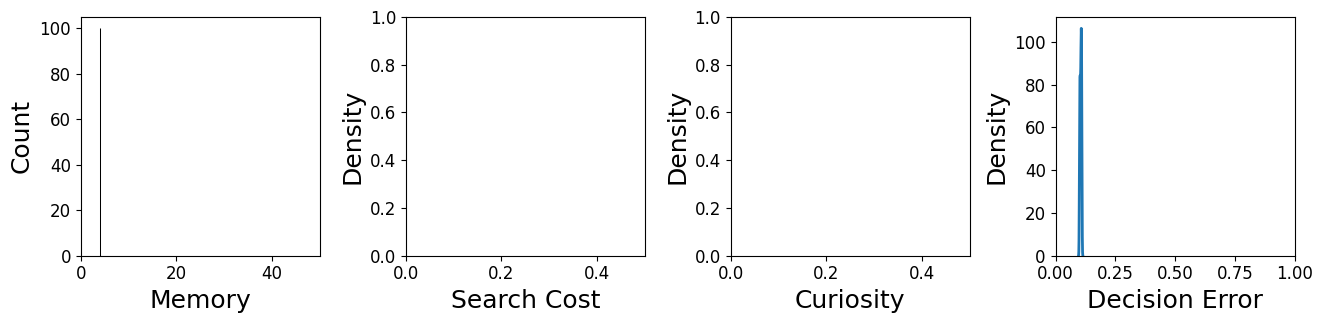

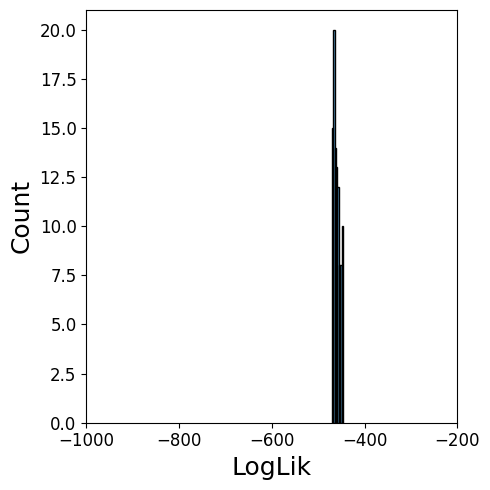

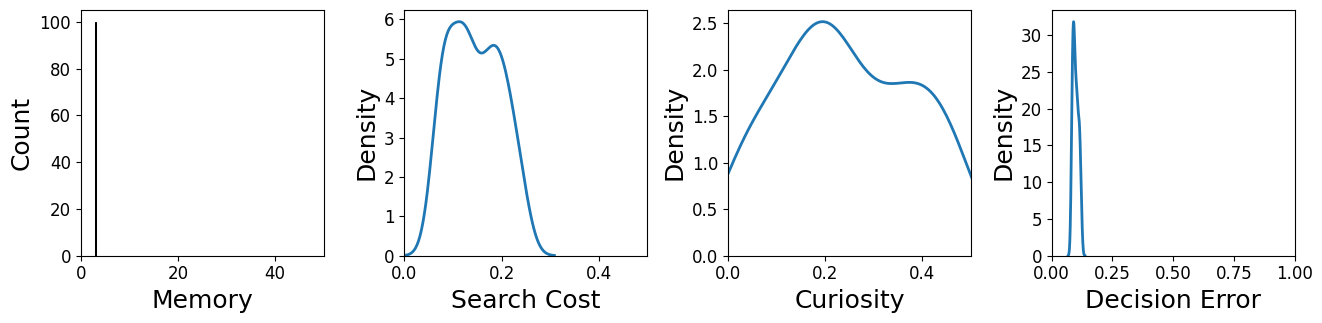

In [43]:
for i in range(6):
    # print(files[i].split('agg_results_')[1].split('_')[0])
    plt_title = "top100_" + files[i].split('agg_results_')[1].split('_')[0] + f'_{level}'
    loglik_dist(tops[i],plt_title,'auto')
    plot_4panel(tops[i],plt_title,20)